In [21]:
#import
import pandas as pd

#adatimport
df=pd.read_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\szószok\\aaaaa.xlsx")


In [22]:
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
df3=pd.DataFrame()
df3["lat"]=df["lat1"]
df3["long"]=df["long"]
df3.dropna(inplace=True)
#outlier detection
latz=np.abs(stats.zscore(df3['lat']))
longz=np.abs(stats.zscore(df3['long']))


df3["latz"]=latz
df3["longz"]=longz
df3 = df3[~((df3["longz"] > 3) | (df3["longz"] < -3) | (df3["latz"] > 3) | (df3["latz"] < -3))]


In [23]:
print(len(df3))
print(len(df))

213
220


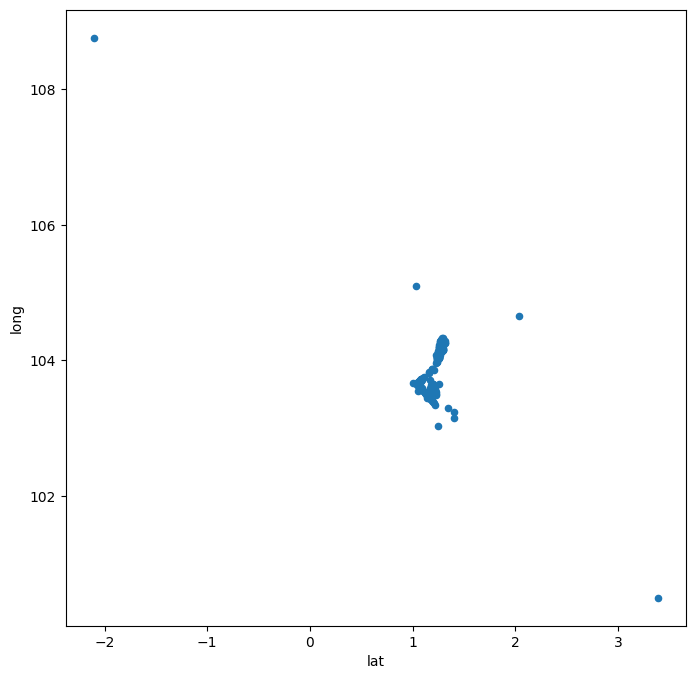

In [24]:

#df3 viz azért, hogy klaszterezési módszert válasszak
df3.plot(x="lat", y="long", kind="scatter", figsize=(8, 8))
plt.show()


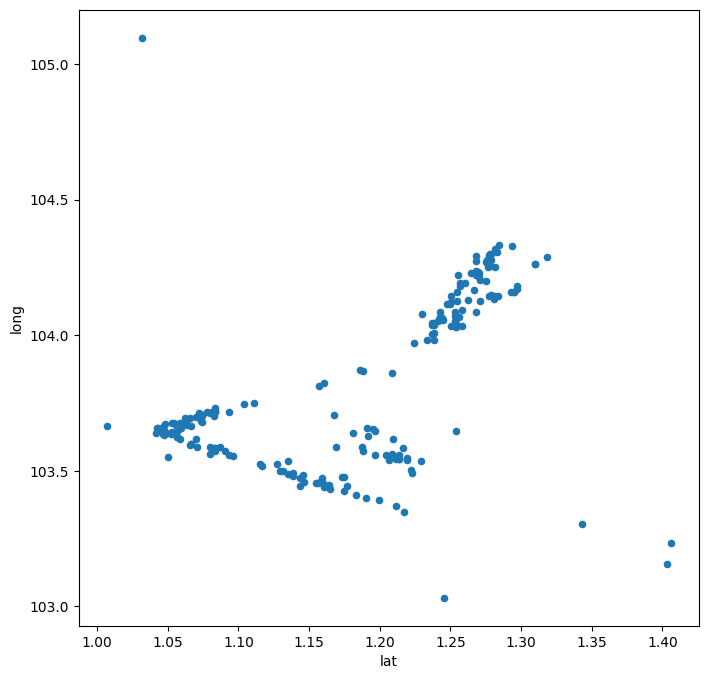

In [25]:
#további szűrés ábra alapján
df3 = df3[~((df3["lat"] > 2) | (df3["lat"] < -1) | (df3["long"] > 108))]
df3.plot(x="lat", y="long", kind="scatter", figsize=(8, 8))
plt.show()

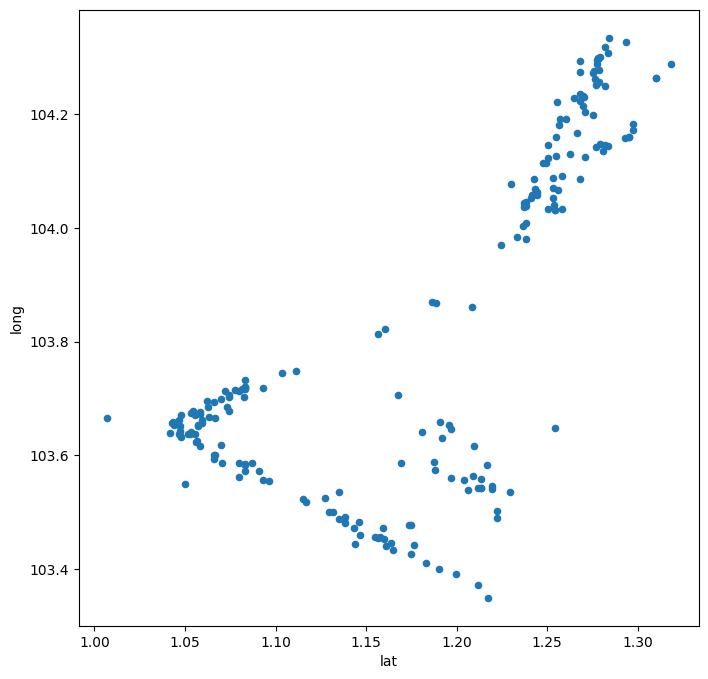

In [57]:
df3 = df3[~((df3["lat"] > 1.33) | (df3["long"] < 103.25) | (df3["long"] > 105))]
df3.plot(x="lat", y="long", kind="scatter", figsize=(8, 8))
plt.show()

C:\Users\Andris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

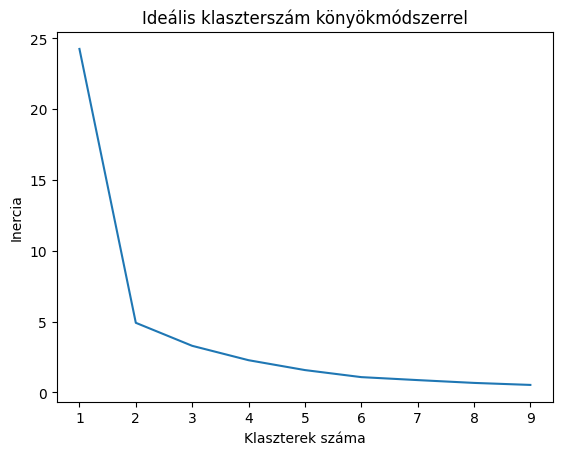

In [26]:
#ideális klaszterszám
from sklearn.cluster import KMeans

#df3.drop(columns=["latz", "longz"], inplace=True) ezt csak ideiglenesen vettem ki, am benne kell maradnia
konyok=[]
for x in range(1, 10):
    kmeans = KMeans(n_clusters=x)
    kmeans.fit(df3)
    konyok.append(kmeans.inertia_)

plt.plot(range(1,10), konyok)
plt.title('Ideális klaszterszám könyökmódszerrel')
plt.xlabel('Klaszterek száma')
plt.ylabel('Inercia')
plt.show()

C:\Users\Andris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


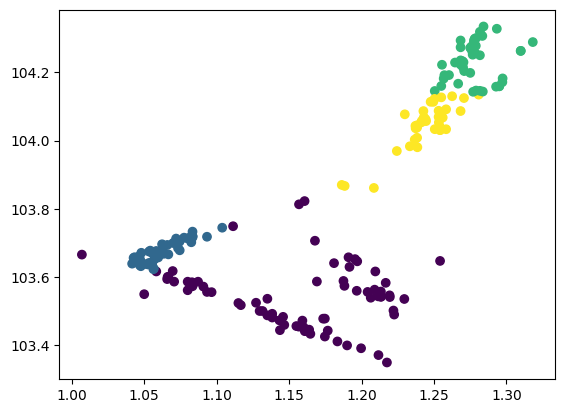

In [87]:
#lefuttatás ideális klaszterszámmal (2)
kmeans = KMeans(n_clusters=4)
kmeans.fit(df3)
plt.scatter(df3["lat"], df3["long"], c=kmeans.labels_)
plt.show()

#eredmények

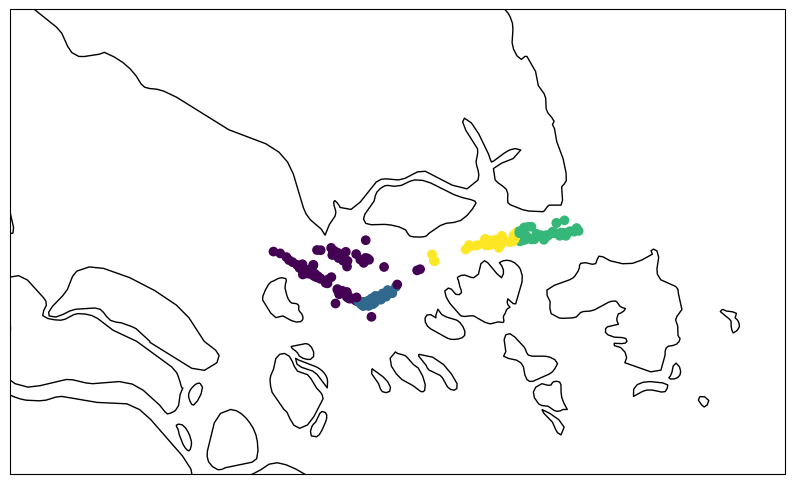

In [88]:
#térképes háttérrel
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 10))
ax.coastlines() 
ax.scatter(df3["long"], df3["lat"], transform=ccrs.PlateCarree(), c=kmeans.labels_) 
ax.set_extent([102.5, 105, 0.5, 2])

plt.show()



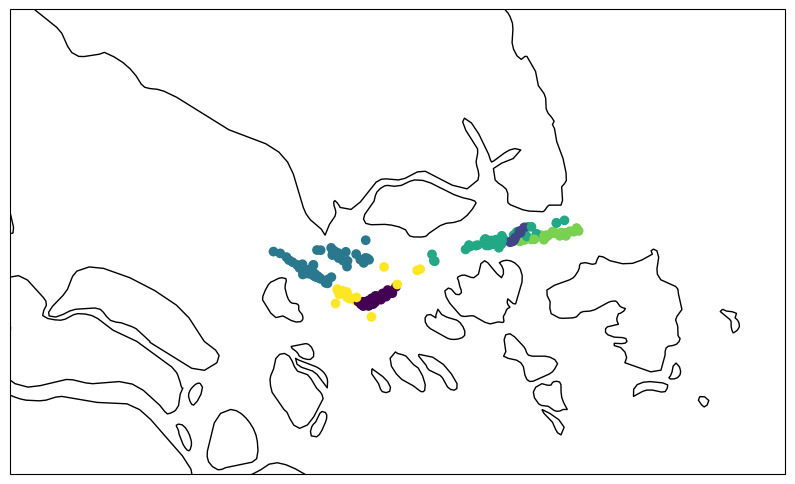

In [78]:

from sklearn.mixture import GaussianMixture
X=df3
gmm = GaussianMixture(n_components=6, random_state=0) 
gmm.fit(X)


gmmlabels = gmm.predict(X)

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 10))
ax.coastlines() 
ax.scatter(df3["long"], df3["lat"], transform=ccrs.PlateCarree(), c=gmmlabels) 
ax.set_extent([102.5, 105, 0.5, 2])

plt.show()
